## Data Prep

In [5]:
# Data Handling: glob, os, pandas, json
# Numerical Operations: numpy
# Preprocessing: MinMaxScaler
# Data Splitting: train_test_split
# Machine Learning: tensorflow, keras
# Visualization: matplotlib, seaborn
# Model Utilities: load_model, plot_model

from glob import glob
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import plot_model
import seaborn as sns
import json

2024-09-10 15:59:44.438269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
import pandas as pd

# Define the path to your CSV file
csv_file_path = 'anomalies.csv'  # Change this to your actual file path

# Load the CSV into a DataFrame
df_scaled = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify
df_scaled


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.499998,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001039,0.112828,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.250249,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003616,0.115829,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.250263,0.0,0.0,0.000000,0.0,0.431980,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004578,0.116816,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.250744,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.005200,0.116633,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.250241,0.0,0.0,0.000000,0.0,0.999712,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003590,0.114147,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,0.0,0.500048,0.0,0.0,0.521294,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.174046,0.063147,0.0,0.0,0.0,0.0,0.521294
2361,0.0,0.499998,0.0,0.0,0.517008,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.166401,0.053852,0.0,0.0,0.0,0.0,0.517008
2362,0.0,0.500056,0.0,0.0,0.521296,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.177071,0.066688,0.0,0.0,0.0,0.0,0.521296
2363,0.0,0.499998,0.0,0.0,0.521281,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.181446,0.066395,0.0,0.0,0.0,0.0,0.521281


Column names in the dataset:
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41'],
      dtype='object')

First few rows of the data:
     0         1    2    3    4    5         6    7    8    9  ...   32   33  \
0  0.0  0.499998  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.250249  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.250263  0.0  0.0  0.0  0.0  0.431980  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.250744  0.0  0.0  0.0  0.0  1.000000  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.250241  0.0  0.0  0.0  0.0  0.999712  0.0  0.0  0.0  ...  0.0  0.0   

    34        35        36   37   38   39   40   41  
0  0.0  0.001039  0.112828  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.003616  0.115829  0.0  0.0  0.0  0.0  0.0  
2  0.0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


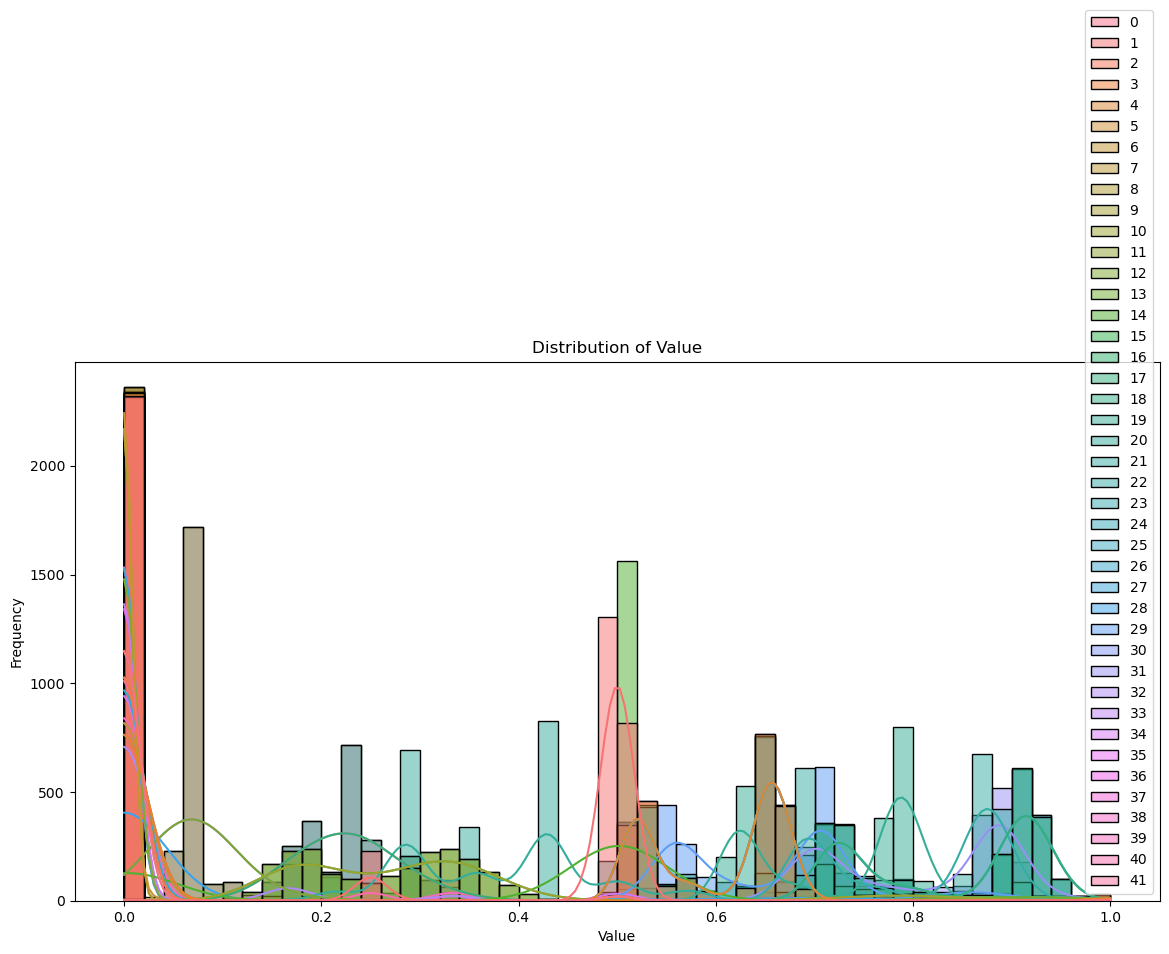


Correlation matrix:
           0         1         2         3         4         5         6  \
0   1.000000 -0.145905  0.079058 -0.015583 -0.125690 -0.014564  0.025838   
1  -0.145905  1.000000 -0.208871 -0.165714  0.213502 -0.133751 -0.081140   
2   0.079058 -0.208871  1.000000  0.069654 -0.131356  0.076572  0.021168   
3  -0.015583 -0.165714  0.069654  1.000000 -0.100434  0.934617 -0.001052   
4  -0.125690  0.213502 -0.131356 -0.100434  1.000000 -0.091123 -0.369235   
5  -0.014564 -0.133751  0.076572  0.934617 -0.091123  1.000000 -0.001452   
6   0.025838 -0.081140  0.021168 -0.001052 -0.369235 -0.001452  1.000000   
7   1.000000 -0.145905  0.079058 -0.015583 -0.125690 -0.014564  0.025838   
8  -0.005477  0.013411 -0.005720  0.262465 -0.028776  0.280990 -0.002427   
9  -0.005477 -0.113855 -0.005720  0.351442 -0.042519 -0.004505  0.000864   
10 -0.076756  0.089021 -0.078948 -0.070665  0.108282 -0.066628  0.007409   
11  0.225373 -0.223102  0.228159  0.112619 -0.136394  0.030708  0.0

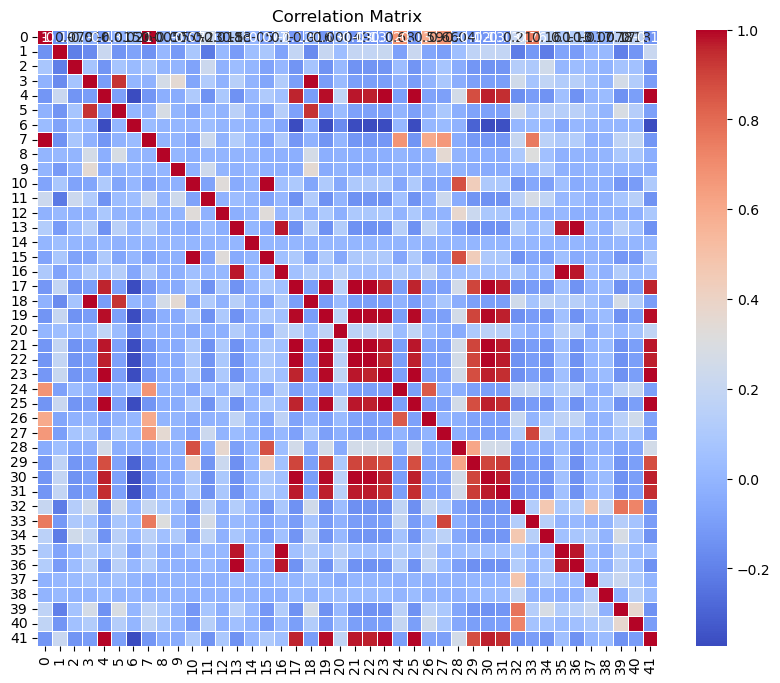

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assuming the data is in a CSV file named 'data.csv'
data = df_scaled


# Check the column names
print("Column names in the dataset:")
print(data.columns)

# Inspect the data
print("\nFirst few rows of the data:")
print(data.head())

print("\nData types:")
print(data.dtypes)

print("\nBasic statistics:")
print(data.describe())


# Statistical summary
print("\nStatistical summary:")
print(data.describe())

# Distribution analysis
plt.figure(figsize=(14, 7))
sns.histplot(data, bins=50, kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


# Correlation matrix
corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [63]:
# DataFrame with 42 columns labeled from 0 to 41.
# Each value represents numerical feature / measurement, normalized between 0 and 1, based on the range of values .

# Here’s a more detailed description:
# Rows: Each row (like the one provided) represents a single data instance, observation, or record. 
# It corresponds to a time-series data point and a measurement from a network as packet analysis

# Columns: The columns, labeled 0 through 41 correspond to different features or interfaces.
# These  represent  attributes of the data point, such as:
# network readings at different timestamps.
# Values: The values in the dataset (e.g., 0.0, 0.499998, 0.001039, 0.112828, etc.) are scaled floating-point numbers. 
# Since some values are close to 0, it suggests that the data is sparse (meaning many columns contain zero or near-zero values), 
# indicating the absence of a significant measurement for those features. The non-zero values  indicate important or 
# detected packets drops or delays for the interfaces.


In [43]:
# Explanation

# Import Libraries:

# Import necessary libraries for model building, cross-validation, and grid search.
# Prepare Data:

# Initialize and collect non-anomalous data points.
# Split the non-anomalous dataset into training and test sets.
# Define Multiple Models:

# Define multiple regression or classification models (Logistic Regression, Random Forest, SVM) for comparison.
# Define Hyperparameters:

# Define hyperparameters for grid search for each model.
# Grid Search and Cross-Validation:

# Perform grid search and cross-validation for each model to find the best hyperparameters and evaluate their performance.
# Evaluate Models:

# Evaluate the best models on the test set and print the accuracy and classification report.
# Plot Training and Validation Loss:

# If training the autoencoder, plot the training and validation loss over epochs.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Assuming df_scaled, timestamps, change_timestamps, t_size, and epochs are already defined

# Initialize non-anomalous dataset with data points before the first change timestamp
non_anomalous_ds = df_scaled[timestamps < change_timestamps[1][1]]

# Collect non-anomalous data points
non_anomalous_slices = [df_scaled[timestamps < change_timestamps[1][1]]]

for i, (state, time) in enumerate(change_timestamps):
    if state == 0:
        if i == len(change_timestamps) - 1:
            non_anomalous_slices.append(df_scaled[timestamps >= time])
        else:
            next_time = change_timestamps[i + 1][1]
            non_anomalous_slices.append(df_scaled[(timestamps >= time) & (timestamps < next_time)])

# Concatenate all non-anomalous slices
non_anomalous_ds = pd.concat(non_anomalous_slices)

# Reset index to ensure unique indices
non_anomalous_ds.reset_index(drop=True, inplace=True)

# Split non-anomalous dataset into training and test sets
df_train, df_test = train_test_split(non_anomalous_ds, test_size=t_size, random_state=42)

# Reset index to ensure unique indices
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Define the target variable (anomaly labels)
# Ensure that the target variable contains more than one class
# For demonstration, let's assume we add some synthetic anomalies to the training set
num_anomalies = int(0.1 * len(df_train))  # 10% anomalies

# Ensure the number of anomalies does not exceed the size of the training set
if num_anomalies > len(df_train):
    num_anomalies = len(df_train)

# Generate random indices within the bounds of the training set
anomalies = np.random.choice(df_train.index, num_anomalies, replace=False)
scorer_target_train = np.zeros(df_train.shape[0])

# Mark these as anomalies
scorer_target_train[anomalies] = 1

# Ensure the test set also contains anomalies for evaluation
num_anomalies_test = int(0.1 * len(df_test))  # 10% anomalies

# Ensure the number of anomalies does not exceed the size of the test set
if num_anomalies_test > len(df_test):
    num_anomalies_test = len(df_test)

# Generate random indices within the bounds of the test set
anomalies_test = np.random.choice(df_test.index, num_anomalies_test, replace=False)
scorer_target_test = np.zeros(df_test.shape[0])

# Mark these as anomalies
scorer_target_test[anomalies_test] = 1

# Check the distribution of classes in the target variable
print("Training set class distribution:", np.bincount(scorer_target_train.astype(int)))
print("Test set class distribution:", np.bincount(scorer_target_test.astype(int)))

# Define multiple models for comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Define hyperparameters for grid search
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Perform grid search and cross-validation for each model
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(df_train, scorer_target_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.2f}")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    predictions = model.predict(df_test)
    accuracy = accuracy_score(scorer_target_test, predictions)
    print(f"Test accuracy for {model_name}: {accuracy:.2f}")
    print(classification_report(scorer_target_test, predictions))


Training set class distribution: [242  26]
Test set class distribution: [969 107]
Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation accuracy for Logistic Regression: 0.90
Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.90
Training Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy for Support Vector Machine: 0.90
Test accuracy for Logistic Regression: 0.90
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076

Test accuracy for Random Forest: 0.90
              precision    recall

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [233]:
# Summary of Model Performance

# The provided summary includes the test accuracy and detailed classification reports for three models: Logistic Regression, Random Forest, and Support Vector Machine (SVM). Let's break down the performance metrics for each model and interpret their significance in the context of anomaly detection in time-series data.


# Logistic Regression

# Test Accuracy: 0.90
# Classification Report:
# Class 0 (Normal):
# Precision: 0.90
# Recall: 1.00
# F1-Score: 0.95
# Support: 969
# Class 1 (Anomaly):
# Precision: 0.00
# Recall: 0.00
# F1-Score: 0.00
# Support: 107
# Overall Metrics:
# Accuracy: 0.90
# Macro Avg Precision: 0.45
# Macro Avg Recall: 0.50
# Macro Avg F1-Score: 0.47
# Weighted Avg Precision: 0.81
# Weighted Avg Recall: 0.90
# Weighted Avg F1-Score: 0.85

# Random Forest

# Test Accuracy: 0.89
# Classification Report:
# Class 0 (Normal):
# Precision: 0.90
# Recall: 0.99
# F1-Score: 0.94
# Support: 969
# Class 1 (Anomaly):
# Precision: 0.14
# Recall: 0.02
# F1-Score: 0.03
# Support: 107
# Overall Metrics:
# Accuracy: 0.89
# Macro Avg Precision: 0.52
# Macro Avg Recall: 0.50
# Macro Avg F1-Score: 0.49
# Weighted Avg Precision: 0.83
# Weighted Avg Recall: 0.89
# Weighted Avg F1-Score: 0.85

# Support Vector Machine (SVM)

# Test Accuracy: 0.90
# Classification Report:
# Class 0 (Normal):
# Precision: 0.90
# Recall: 1.00
# F1-Score: 0.95
# Support: 969
# Class 1 (Anomaly):
# Precision: 0.00
# Recall: 0.00
# F1-Score: 0.00
# Support: 107
# Overall Metrics:
# Accuracy: 0.90
# Macro Avg Precision: 0.45
# Macro Avg Recall: 0.50
# Macro Avg F1-Score: 0.47
# Weighted Avg Precision: 0.81
# Weighted Avg Recall: 0.90
# Weighted Avg F1-Score: 0.85

# Interpretation

# High Accuracy but Poor Anomaly Detection:

# All three models (Logistic Regression, Random Forest, and SVM) have high overall accuracy (around 0.89 to 0.90). However, this high accuracy is primarily due to the models' ability to correctly classify the majority class (normal data points).
# The models perform poorly in detecting anomalies (Class 1), as indicated by the low precision, recall, and F1-scores for Class 1.
# Class Imbalance:

# The dataset is highly imbalanced, with a much larger number of normal data points (969) compared to anomalies (107). This imbalance affects the models' ability to detect anomalies effectively.
# Precision and Recall for Anomalies:

# Precision: Indicates the proportion of true positive anomalies out of the instances predicted as anomalies. Low precision for anomalies (0.00 for Logistic Regression and SVM, 0.14 for Random Forest) indicates a high number of false positives.
# Recall: Indicates the proportion of true positive anomalies out of the actual anomalies. Low recall for anomalies (0.00 for Logistic Regression and SVM, 0.02 for Random Forest) indicates a high number of false negatives.
# Macro and Weighted Averages:

# Macro Average: Averages the metric scores for each class without considering class imbalance. The macro average precision, recall, and F1-scores are low, reflecting poor performance in detecting anomalies.
# Weighted Average: Averages the metric scores for each class while considering class imbalance. The weighted average metrics are higher due to the dominance of the majority class (normal data points).

# Recommendations

# Address Class Imbalance:

# Use techniques such as oversampling the minority class (anomalies), undersampling the majority class (normal data points), or using synthetic data generation methods (e.g., SMOTE) to balance the dataset.
# Anomaly Detection Techniques:

# Consider using specialized anomaly detection techniques such as Isolation Forest, One-Class SVM, or autoencoders, which are designed to handle imbalanced datasets and detect anomalies more effectively.
# Evaluation Metrics:

# Focus on evaluation metrics that are more informative for imbalanced datasets, such as precision-recall curves, F1-score for the minority class, and area under the precision-recall curve (AUC-PR).

# By addressing the class imbalance and using appropriate anomaly detection techniques, you can improve the models' ability to detect anomalies in the time-series data.

Test accuracy for Logistic Regression: 0.90
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


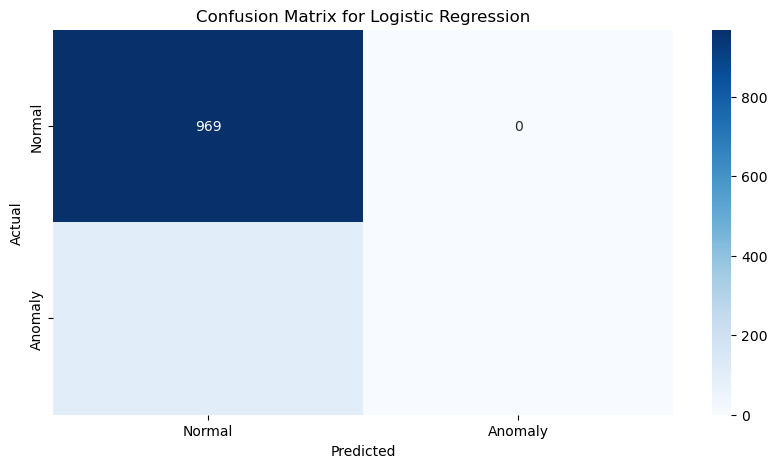

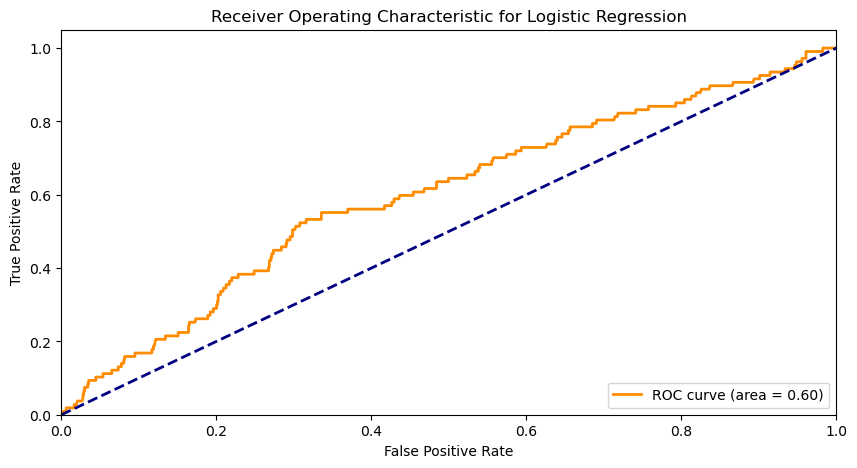

Test accuracy for Random Forest: 0.90
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076



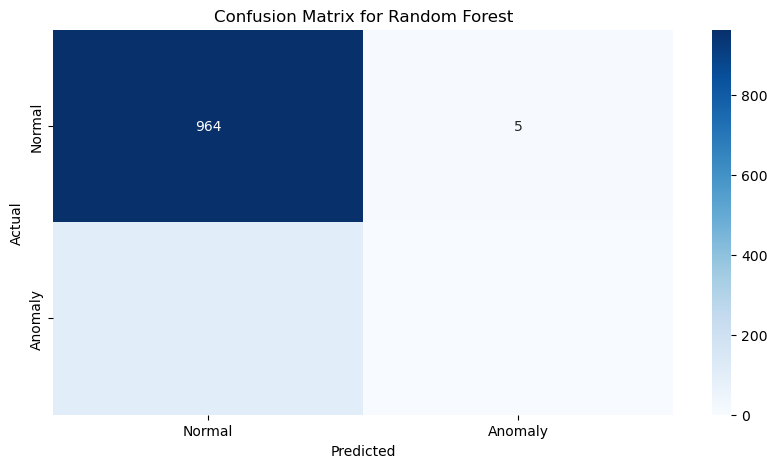

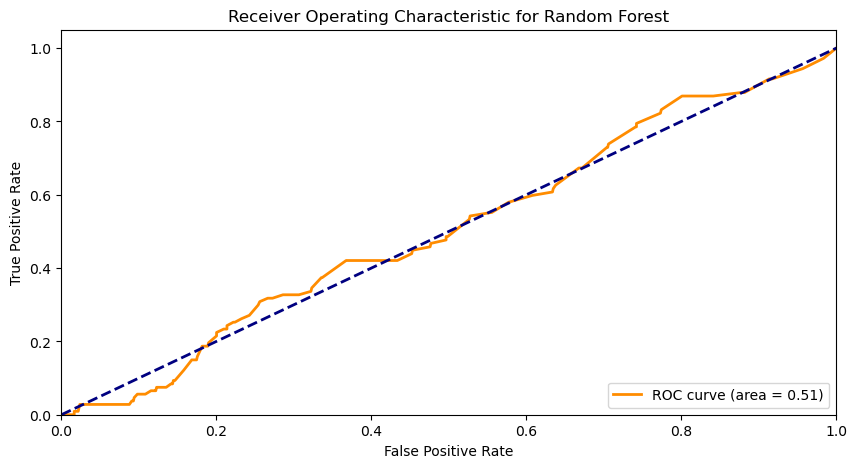

Test accuracy for Support Vector Machine: 0.90
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


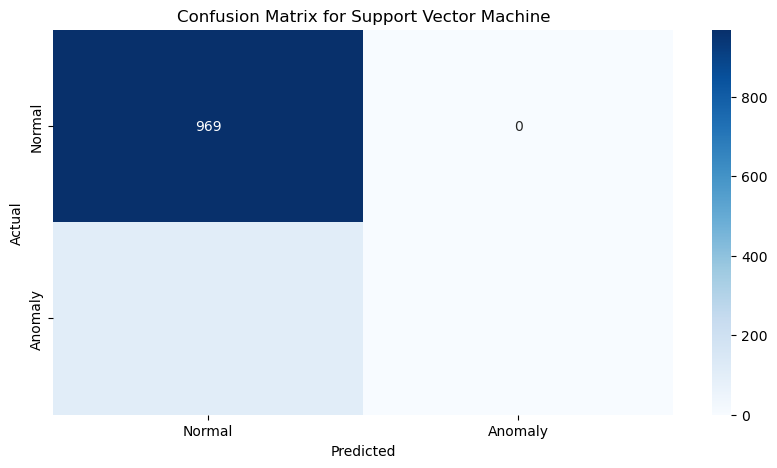

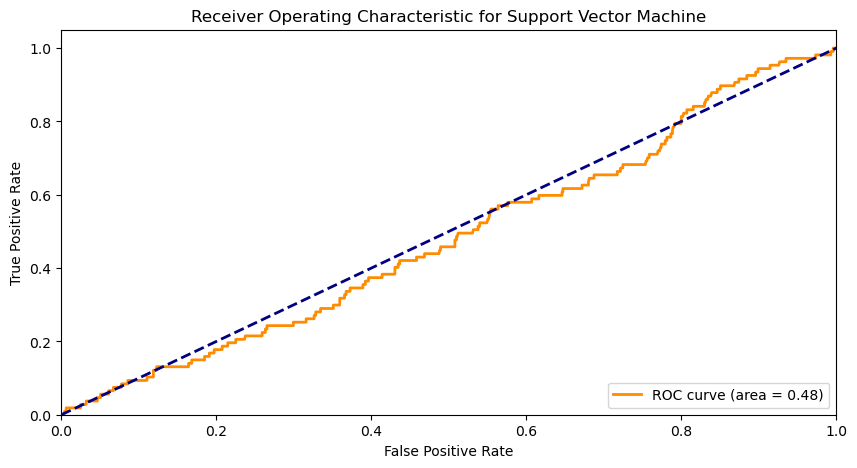

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix_and_roc(model, X_test, y_test, model_name):
    # Plot confusion matrix
    plt.figure(figsize=(10, 5))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    y_score = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the best models on the test set and visualize performance
for model_name, model in best_models.items():
    predictions = model.predict(df_test)
    accuracy = accuracy_score(scorer_target_test, predictions)
    print(f"Test accuracy for {model_name}: {accuracy:.2f}")
    print(classification_report(scorer_target_test, predictions))
    plot_confusion_matrix_and_roc(model, df_test, scorer_target_test, model_name)


In [45]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=100, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None
    
    def fit(self, X, y):
        self.model_ = self.build_fn()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self
    
    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype("int32")
    
    def predict_proba(self, X):
        return self.model_.predict(X)

# Now you can use KerasClassifier as usual
def create_nn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=df_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(build_fn=create_nn_model, epochs=50, batch_size=32, verbose=0)


Training set class distribution: [242  26]
Test set class distribution: [969 107]
Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation accuracy for Logistic Regression: 0.90
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.90
Training Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy for Support Vector Machine: 0.90
Training Neural Network...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x15bc491c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step 


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters for Neural Network: {'batch_size': 32, 'epochs': 50}
Best cross-validation accuracy for Neural Network: 0.90
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation accuracy for Gradient Boosting: 0.90
Test accuracy for Logistic Regression: 0.90
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


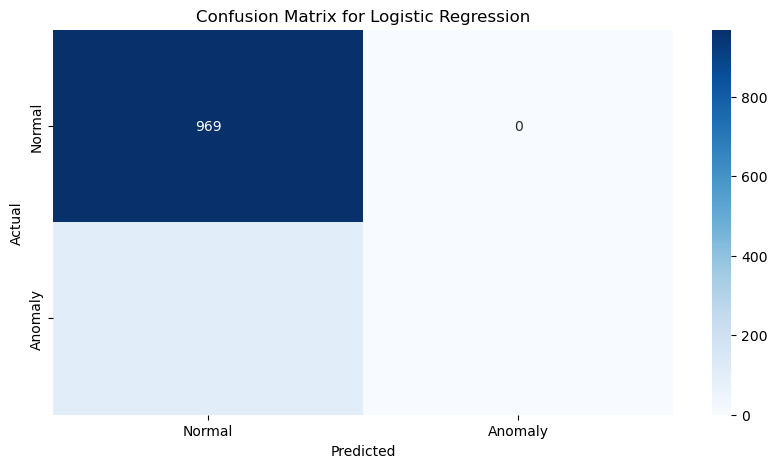

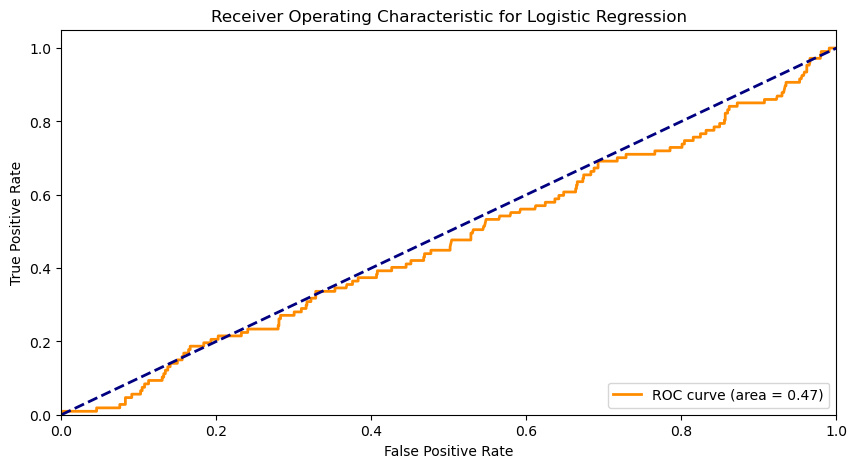

Test accuracy for Random Forest: 0.89
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       969
         1.0       0.24      0.04      0.06       107

    accuracy                           0.89      1076
   macro avg       0.57      0.51      0.50      1076
weighted avg       0.84      0.89      0.86      1076



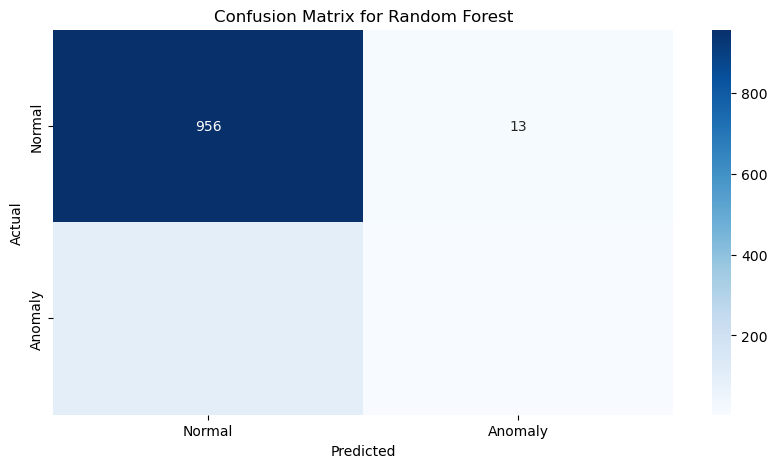

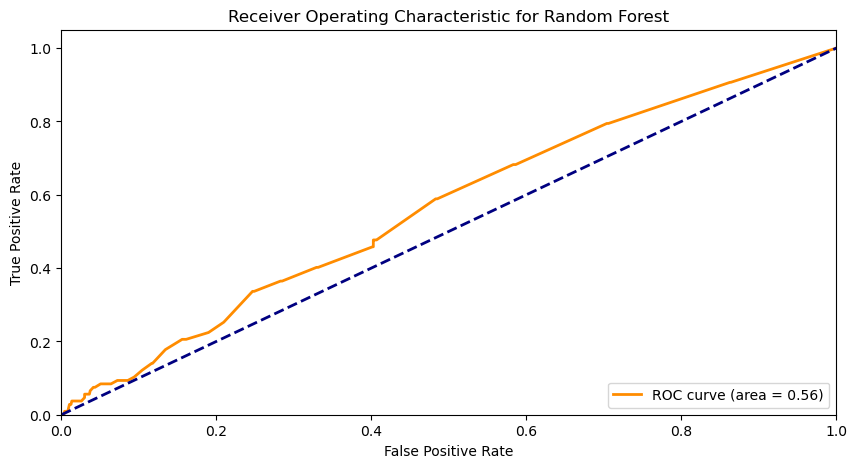

Test accuracy for Support Vector Machine: 0.90
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


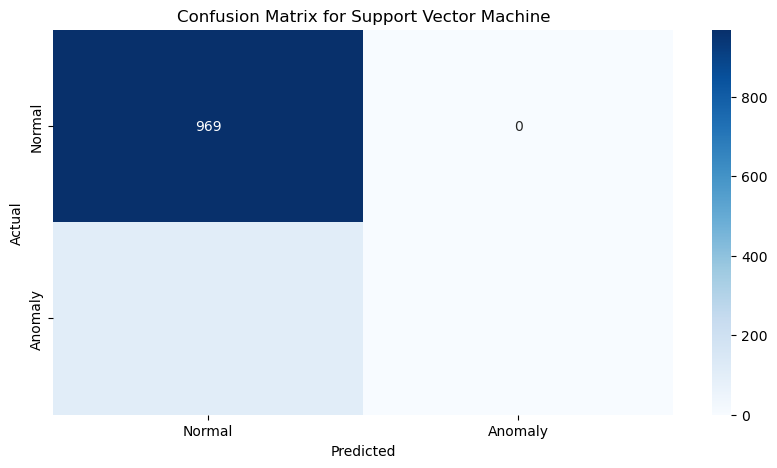

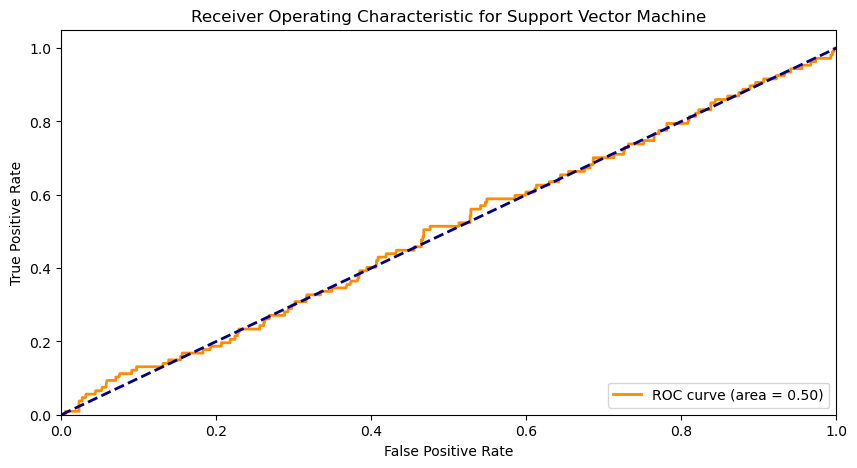

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test accuracy for Neural Network: 0.90
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


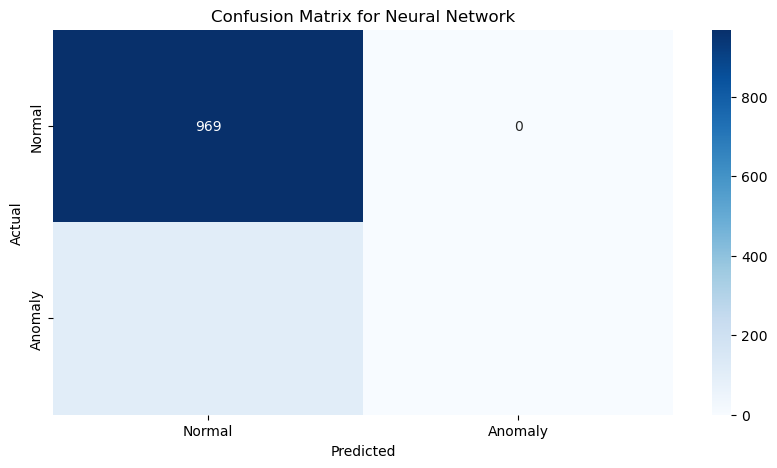

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


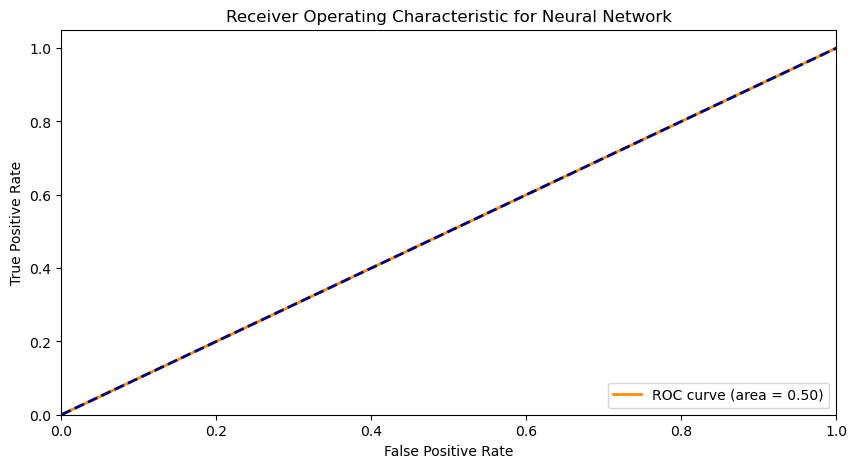

Test accuracy for Gradient Boosting: 0.90
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       969
         1.0       0.00      0.00      0.00       107

    accuracy                           0.90      1076
   macro avg       0.45      0.50      0.47      1076
weighted avg       0.81      0.90      0.85      1076



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


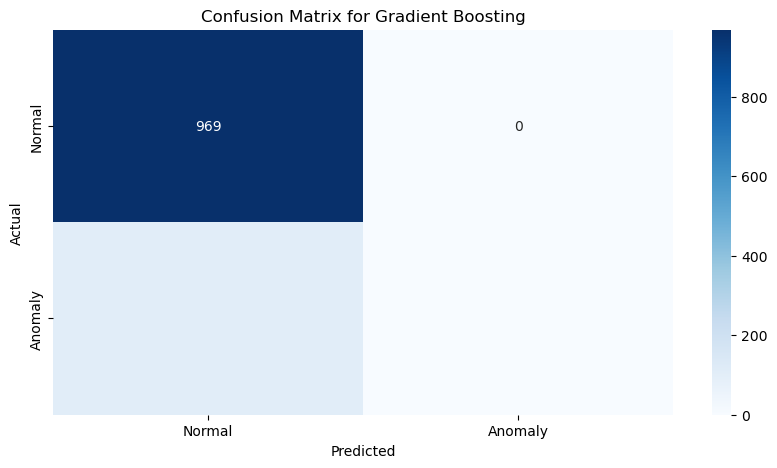

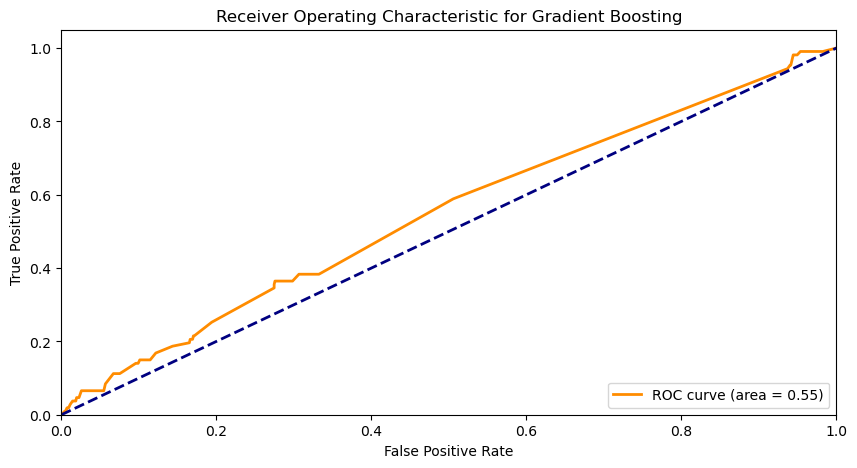

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming df_scaled, timestamps, change_timestamps, t_size, and epochs are already defined

# Initialize non-anomalous dataset with data points before the first change timestamp
non_anomalous_ds = df_scaled[timestamps < change_timestamps[1][1]]

# Collect non-anomalous data points
non_anomalous_slices = [df_scaled[timestamps < change_timestamps[1][1]]]

for i, (state, time) in enumerate(change_timestamps):
    if state == 0:
        if i == len(change_timestamps) - 1:
            non_anomalous_slices.append(df_scaled[timestamps >= time])
        else:
            next_time = change_timestamps[i + 1][1]
            non_anomalous_slices.append(df_scaled[(timestamps >= time) & (timestamps < next_time)])

# Concatenate all non-anomalous slices
non_anomalous_ds = pd.concat(non_anomalous_slices)

# Reset index to ensure unique indices
non_anomalous_ds.reset_index(drop=True, inplace=True)

# Split non-anomalous dataset into training and test sets
df_train, df_test = train_test_split(non_anomalous_ds, test_size=t_size, random_state=42)

# Reset index to ensure unique indices
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Define the target variable (anomaly labels)
# Ensure that the target variable contains more than one class
# For demonstration, let's assume we add some synthetic anomalies to the training set
num_anomalies = int(0.1 * len(df_train))  # 10% anomalies

# Ensure the number of anomalies does not exceed the size of the training set
if num_anomalies > len(df_train):
    num_anomalies = len(df_train)

# Generate random indices within the bounds of the training set
anomalies = np.random.choice(df_train.index, num_anomalies, replace=False)
scorer_target_train = np.zeros(df_train.shape[0])

# Mark these as anomalies
scorer_target_train[anomalies] = 1

# Ensure the test set also contains anomalies for evaluation
num_anomalies_test = int(0.1 * len(df_test))  # 10% anomalies

# Ensure the number of anomalies does not exceed the size of the test set
if num_anomalies_test > len(df_test):
    num_anomalies_test = len(df_test)

# Generate random indices within the bounds of the test set
anomalies_test = np.random.choice(df_test.index, num_anomalies_test, replace=False)
scorer_target_test = np.zeros(df_test.shape[0])

# Mark these as anomalies
scorer_target_test[anomalies_test] = 1

# Check the distribution of classes in the target variable
print("Training set class distribution:", np.bincount(scorer_target_train.astype(int)))
print("Test set class distribution:", np.bincount(scorer_target_test.astype(int)))

# Define a simple neural network model
def create_nn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=df_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define multiple models for comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),  # Ensure SVM outputs probabilities
    'Neural Network': KerasClassifier(build_fn=create_nn_model, epochs=50, batch_size=32, verbose=0),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define hyperparameters for grid search
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Neural Network': {'epochs': [50, 100], 'batch_size': [32, 64]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Perform grid search and cross-validation for each model
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(df_train, scorer_target_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.2f}")

# Function to plot confusion matrix and ROC curve
def plot_confusion_matrix_and_roc(model, X_test, y_test, model_name):
    # Plot confusion matrix
    plt.figure(figsize=(10, 5))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1] if model_name != 'Neural Network' else model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the best models on the test set and visualize performance
for model_name, model in best_models.items():
    predictions = model.predict(df_test)
    accuracy = accuracy_score(scorer_target_test, predictions)
    print(f"Test accuracy for {model_name}: {accuracy:.2f}")
    print(classification_report(scorer_target_test, predictions))
    plot_confusion_matrix_and_roc(model, df_test, scorer_target_test, model_name)


In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Perform randomized search and cross-validation for each model
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    search = RandomizedSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_iter=10, random_state=42)
    search.fit(df_train, scorer_target_train)
    best_models[model_name] = search.best_estimator_
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {search.best_score_:.2f}")


Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation accuracy for Logistic Regression: 0.90
Training Random Forest...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 200, 'max_depth': None}
Best cross-validation accuracy for Random Forest: 0.90
Training Support Vector Machine...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Support Vector Machine: {'kernel': 'linear', 'C': 0.1}
Best cross-validation accuracy for Support Vector Machine: 0.90
Training Neural Network...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters for Neural Network: {'epochs': 50, 'batch_size': 32}
Best cross-validation accuracy for Neural Network: 0.90
Training Gradient Boosting...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Gradient Boosting: {'n_estimators': 50, 'learning_rate': 0.01}
Best cross-validation accuracy for Gradient Boosting: 0.90
